Sources:

https://en.wikipedia.org/wiki/Messier_object

https://astro.unl.edu/naap/distance/cluster_fitting.html



# Analyzing the M10 Cluster against the Main Sequence

The assumption is that cluster stars are gravitationally bound, located at the same distance, and formed from the same gas and dust cloud. Thus, most of the cluster stars should lie on the main sequence.
Any difference in position between the main sequences (cluster vs. nearby stars) is due to the distance of the cluster.

In [381]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

df_m10 = pd.read_csv('m10.csv')
df_cluster1 = pd.read_csv('star_cluster1.csv')
df_cluster2 = pd.read_csv('star_cluster2.csv')

df_m10.dropna(inplace=True)
df_cluster1.dropna(inplace=True)
df_cluster2.dropna(inplace=True)
df_m10

,mg,mb,mr,parallax
0,19.615440,19.971241,18.967777,-0.331040
1,19.849790,20.185947,19.265743,-0.719492
2,20.058685,20.639498,19.298560,0.411485
5,15.347679,15.876700,14.624149,1.258664
6,20.316303,20.673386,19.638496,0.902227
...,...,...,...,...
4994,18.702347,19.627321,17.789991,0.707875
4996,19.398550,19.947979,18.767061,0.132915
4997,19.801249,20.806038,18.943094,0.424077
4998,20.784048,21.157679,20.286129,2.403306


In [382]:
df_m10['color'] = df_m10['mb'] - df_m10['mr']
df_cluster1['color'] = df_cluster1['mb'] - df_cluster1['mr']
df_cluster2['color'] = df_cluster2['mb'] - df_cluster2['mr']
df_m10.head(5)

,mg,mb,mr,parallax,color
0,19.615440,19.971241,18.967777,-0.331040,1.003464
1,19.849790,20.185947,19.265743,-0.719492,0.920204
2,20.058685,20.639498,19.298560,0.411485,1.340938
5,15.347679,15.876700,14.624149,1.258664,1.252551
6,20.316303,20.673386,19.638496,0.902227,1.034890


In [383]:
dominant_parallax1 = df_m10['parallax'].median()
threshold_percentage = 35
df_m10 = df_m10[abs(df_m10['parallax'] - dominant_parallax1) / dominant_parallax1 * 100 < threshold_percentage]

In [384]:
df_m10['parallax_arc'] = df_m10['parallax'] / 1000
df_m10['distance_par'] = 1 / df_m10['parallax_arc']
df_m10['abs_mag'] = df_m10['mg'] - 5 * np.log10(df_m10['distance_par'] / 10) + 5


df_cluster1['parallax_arc'] = df_cluster1['parallax'] / 1000
df_cluster1['distance_par'] = 1 / df_cluster1['parallax_arc']
df_cluster1['M'] = 5 * np.log10(df_cluster1['distance_par'] / 10)
df_cluster1['abs_mag'] = df_cluster1['mg'] - df_cluster1['M']

df_cluster2['parallax_arc'] = df_cluster2['parallax'] / 1000
df_cluster2['distance_par'] = 1 / df_cluster2['parallax_arc']
df_cluster2['M'] = 5 * np.log10(df_cluster2['distance_par'] / 10)
df_cluster2['abs_mag'] = df_cluster2['mg'] - df_cluster2['M']

/var/folders/0b/t_zq87x958lc5wvb065nb89m0000gn/T/ipykernel_46957/2422830756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m10['parallax_arc'] = df_m10['parallax'] / 1000
/var/folders/0b/t_zq87x958lc5wvb065nb89m0000gn/T/ipykernel_46957/2422830756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m10['distance_par'] = 1 / df_m10['parallax_arc']
/var/folders/0b/t_zq87x958lc5wvb065nb89m0000gn/T/ipykernel_46957/2422830756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

In [385]:
df_m10.head(5)

,mg,mb,mr,parallax,color,parallax_arc,distance_par,abs_mag
2,20.058685,20.639498,19.298560,0.411485,1.340938,0.000411,2430.221646,13.130456
12,18.398680,18.939604,17.679506,0.423070,1.260098,0.000423,2363.673309,11.530743
21,20.695553,21.303090,20.142284,0.425747,1.160806,0.000426,2348.813727,13.841310
26,19.534390,20.636680,18.462591,0.336304,2.174089,0.000336,2973.500773,12.168050
29,17.240442,17.724160,16.605963,0.343401,1.118197,0.000343,2912.047127,9.919450


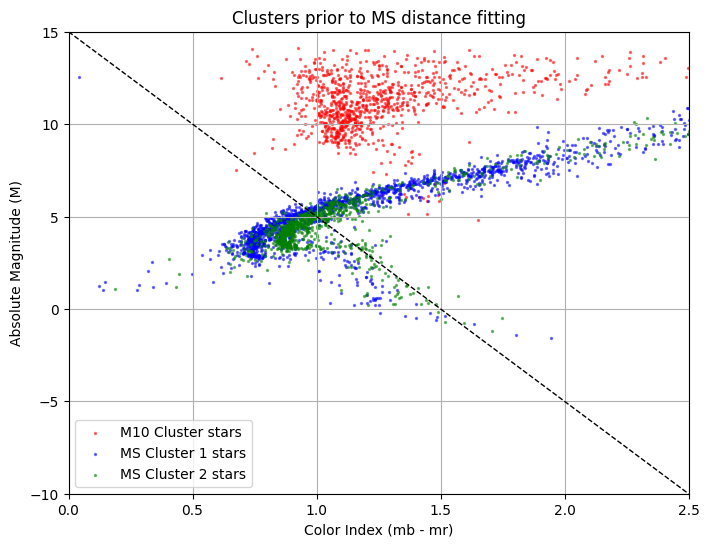

In [386]:
plt.figure(figsize=(8, 6))

plt.scatter(df_m10['color'], df_m10['abs_mag'], s=2, c='red', alpha=0.5, label="M10 Cluster stars")
plt.scatter(df_cluster1['color'], df_cluster1['abs_mag'], s=2, c='blue', alpha=0.5, label="MS Cluster 1 stars")
plt.scatter(df_cluster2['color'], df_cluster2['abs_mag'], s=2, c='green', alpha=0.5, label="MS Cluster 2 stars")

plt.xlabel('Color Index (mb - mr)')
plt.ylabel('Absolute Magnitude (M)')
plt.title('Clusters prior to MS distance fitting')
plt.grid(True)
plt.xlim(0, 2.5)
plt.ylim(15, -10)
plt.legend()
plt.gca().invert_yaxis()

plt.plot([0, 2.5], [15, -10], color='black', linestyle='--', linewidth=1)

plt.show()


# Distance Modulus

Because we have the absolute value of an already calibrated HR diagram of two clusters, we can use one of these main sequences to fit our uncalibrated M10 cluster to this main sequence. To do this, we need to draw our equation:

m - M = 5 * log(d) - 5


/var/folders/0b/t_zq87x958lc5wvb065nb89m0000gn/T/ipykernel_46957/812400724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m10['abs_mag'] = df_m10['mg'] - 5 * np.log10(df_m10['distance_par'] / 100) + 5 * np.log10(distance_guess / 100)


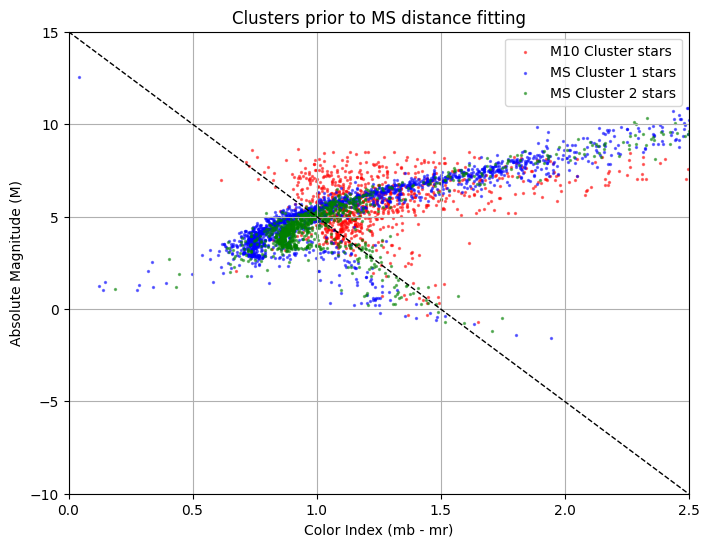

In [406]:
distance_guess = 8
df_m10['abs_mag'] = df_m10['mg'] - 5 * np.log10(df_m10['distance_par'] / 100) + 5 * np.log10(distance_guess / 100)

plt.figure(figsize=(8, 6))

plt.scatter(df_m10['color'], df_m10['abs_mag'], s=2, c='red', alpha=0.5, label="M10 Cluster stars")
plt.scatter(df_cluster1['color'], df_cluster1['abs_mag'], s=2, c='blue', alpha=0.5, label="MS Cluster 1 stars")
plt.scatter(df_cluster2['color'], df_cluster2['abs_mag'], s=2, c='green', alpha=0.5, label="MS Cluster 2 stars")

plt.xlabel('Color Index (mb - mr)')
plt.ylabel('Absolute Magnitude (M)')
plt.title('Clusters prior to MS distance fitting')
plt.grid(True)
plt.xlim(0, 2.5)
plt.ylim(15, -10)
plt.legend()
plt.gca().invert_yaxis()

plt.plot([0, 2.5], [15, -10], color='black', linestyle='--', linewidth=1)

plt.show()